# Big Data Project

## Introduction
This will look into the dataset Sleep Health and Lifestyle Dataset by Laksika Tharmalingam.

The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. 
It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

## reading the data
sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(sleep)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [ ]:
## Calculating how many rows and columns are in this dataset 
num_rows, num_columns = sleep.shape
print(sleep.shape)
print(f'The dataset has {num_rows} observations (rows) 
and {num_columns} features (columns).')

(374, 13)
The dataset has 374 observations (rows) and 13 features (columns).


## Exploratory Data Analysis (EDA) / Data Manipulation

In [ ]:
## renaming variables to analyse the data easier
sleep2 = sleep.rename(columns={'Person ID': 'Person_ID',
                               'Sleep Duration': 'Sleep_Duration', 
                               'Quality of Sleep': 'Quality_of_Sleep', 
                               'Physical Activity Level': 'Physical_Activity_Level',
                              'BMI Category': 'BMI_Category', 
                               'Blood Pressure': 'Blood_Pressure', 
                               'Heart Rate': 'Heart_Rate', 
                               'Daily Steps': ' Daily_Steps', 
                               'Stress Level': 'Stress_Level', 
                               'Sleep Disorder' : 'Sleep_Disorder' })
print(sleep2)

     Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                

In [ ]:
# Calculating how many sample sizes for each occupation
sleep2['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
## Number of genders 
sleep2.groupby('Gender').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,185.0,47.405405,8.093407,29.0,39.0,50.0,53.0,59.0
Male,189.0,37.074074,5.662006,27.0,32.0,38.0,43.0,49.0


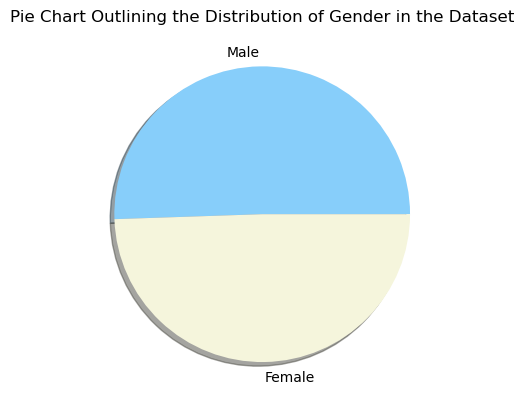

<Figure size 700x500 with 0 Axes>

In [ ]:
## Pie chart for the distribution of male and female
gender_count = sleep.value_counts("Gender")
pie_labels_gender = ["Male", "Female"]
pie_colours = ["lightskyblue", "beige"]
plt.pie(gender_count, labels = pie_labels_gender, 
        shadow = True, colors = pie_colours)
plt.title("Pie Chart Outlining the Distribution of Gender in the Dataset")
plt.figure(figsize = (7, 5))
plt.tight_layout()
plt.show()

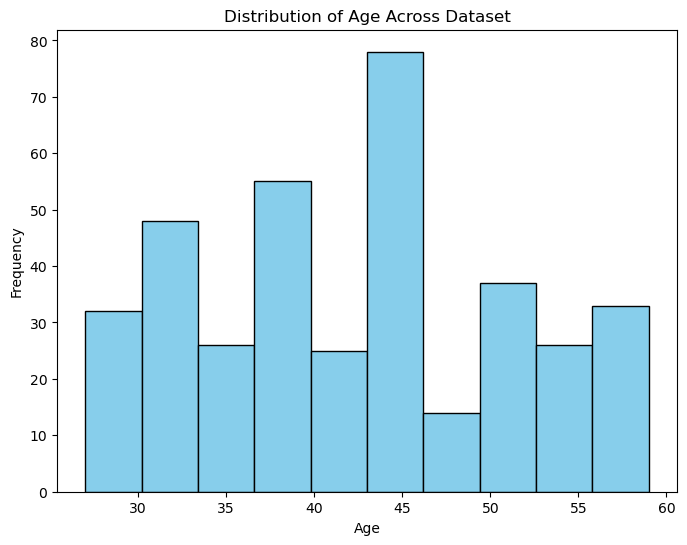

In [ ]:
## Histogram for the  distribution of age 
plt.figure(figsize=(8, 6))
plt.hist(sleep['Age'], bins=10, color='skyblue', edgecolor='black', rwidth = 10)
plt.title("Distribution of Age Across Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## removing the occupations that have a small sample size 
sleep3 = sleep2[
    (sleep2['Occupation'] != 'Manager') & 
    (sleep2['Occupation'] != 'Sales Representative') & 
    (sleep2['Occupation'] != 'Scientist') & 
    (sleep2['Occupation'] != 'Software Engineer')
]
print(sleep3)

     Person_ID  Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
1            2    Male   28     Doctor             6.2                 6   
2            3    Male   28     Doctor             6.2                 6   
6            7    Male   29    Teacher             6.3                 6   
7            8    Male   29     Doctor             7.8                 7   
8            9    Male   29     Doctor             7.8                 7   
..         ...     ...  ...        ...             ...               ...   
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
1            

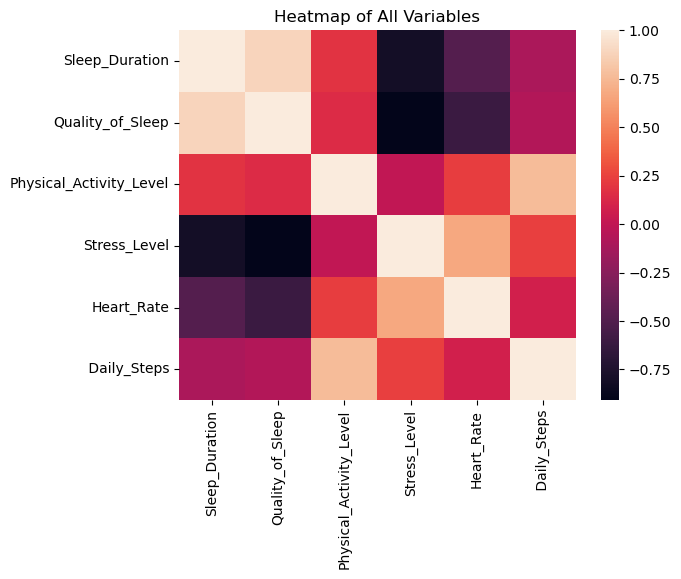

In [ ]:
# Heatmap for all variables 
# Drop the unwanted columns & non-numerical values 
sleep3_filtered = sleep3.drop(['Person_ID', 'Age'], axis=1)

# Calculate the correlation matrix for the filtered DataFrame
corr = sleep3_filtered.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr)
plt.title("Heatmap of All Variables")
plt.show()

In [ ]:
## Categorising Stress Levels  
# low: 3-4, medium: 5-6, high: 7-8 
sleep3.loc[:, "stress_category"] = pd.cut(sleep3["Stress_Level"], 
                                   bins = [3, 4, 6, 8], 
                                   labels = ["Low", "Meduim", "High"])

In [ ]:
sleep3.stress_category.value_counts("High")

stress_category
High      0.393836
Meduim    0.366438
Low       0.239726
Name: proportion, dtype: float64

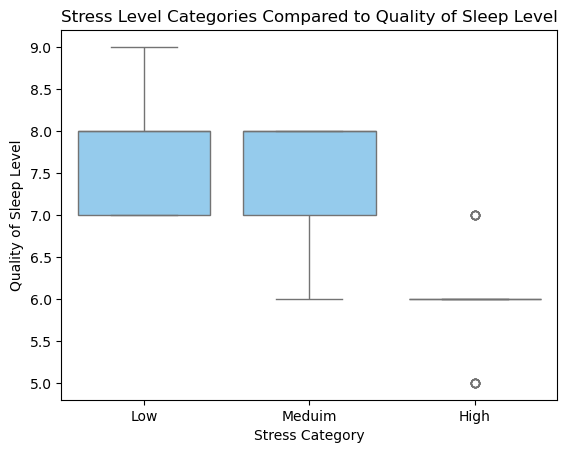

In [ ]:
sns.boxplot(x='stress_category', y='Quality_of_Sleep', data=sleep3, 
            color = "lightskyblue")
plt.title('Stress Level Categories Compared to Quality of Sleep Level')
plt.ylabel("Quality of Sleep Level")
plt.xlabel("Stress Category")
plt.show()

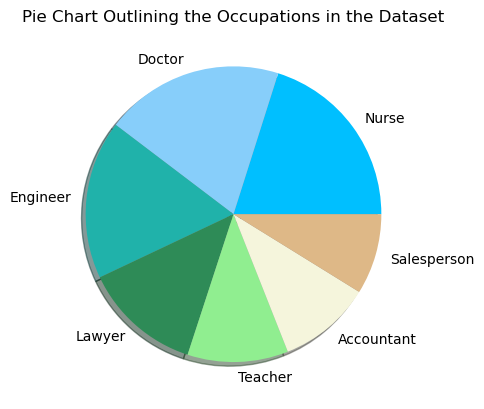

<Figure size 700x500 with 0 Axes>

In [ ]:
## Pie chart Outlining the Occupations in the Dataset
sleep_count = sleep3.value_counts("Occupation")
pie_labels = ["Nurse", "Doctor", "Engineer", "Lawyer", 
              "Teacher", "Accountant", "Salesperson"]
pie_colours = ["deepskyblue", "lightskyblue", "lightseagreen", 
               "seagreen", "lightgreen", "beige", "burlywood"]
plt.pie(sleep_count, labels = pie_labels, shadow = True, colors = pie_colours)
plt.title("Pie Chart Outlining the Occupations in the Dataset")
plt.figure(figsize = (7, 5))
plt.tight_layout()
plt.show()

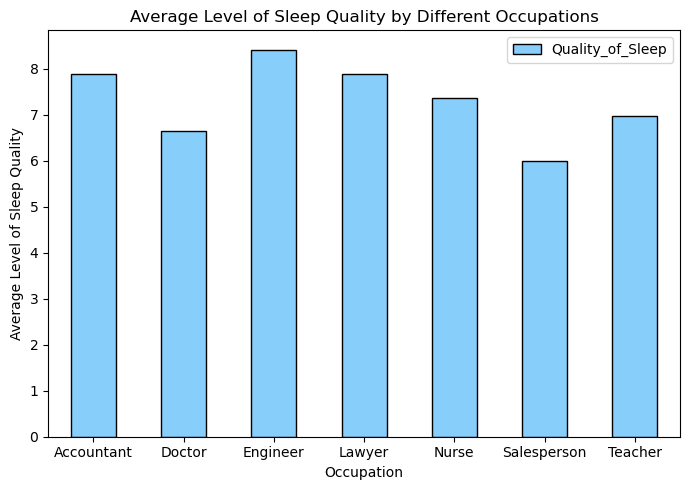

In [ ]:
## Bar chart outlining the quality of sleep level by different occupations
avg_quality_sleep = sleep3.groupby('Occupation')["Quality_of_Sleep"].mean().reset_index()
avg_quality_sleep.plot(kind="bar" , x = "Occupation", 
                       y = "Quality_of_Sleep" , 
                       figsize=(7,5), color = "lightskyblue", 
                       edgecolor = "black" ) 
plt.title("Average Level of Sleep Quality by Different Occupations") 
plt.xticks(rotation=0) #change the x-axis labels to face the correct way.
plt.ylabel("Average Level of Sleep Quality") #add a ylabel title
plt.tight_layout()
plt.show()

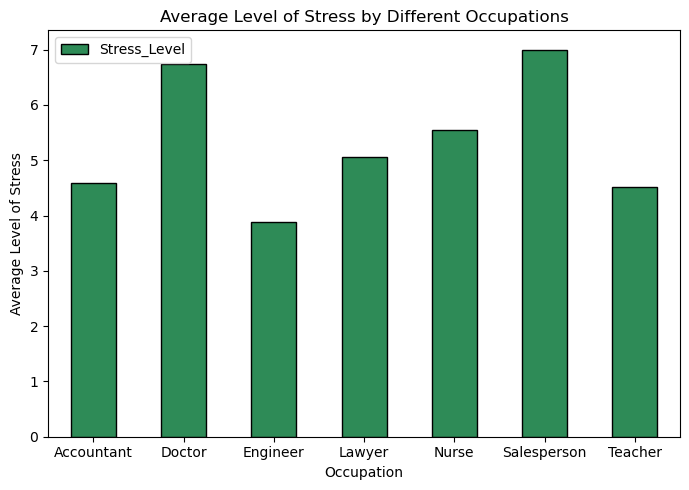

In [ ]:
# Bar chart outlining the average level of stress by different occupations.
avg_stress_job = sleep3.groupby('Occupation')["Stress_Level"].mean().reset_index()
avg_stress_job.plot(kind="bar" , x = "Occupation", y = "Stress_Level",
                    figsize=(7,5), color = "seagreen", edgecolor = "black" ) 
plt.title("Average Level of Stress by Different Occupations") 
plt.xticks(rotation=0) #change the x-axis labels to face the correct way.
plt.ylabel("Average Level of Stress") #add a ylabel title
plt.tight_layout()
plt.show()
## Linear Regression for Stress Levels and Sleep Duration

## Supervised Learning - Linear Regression for Stress Levels and Sleep Duration

In [ ]:
## For Stress Levels and Sleep Duration
model = sklearn.linear_model.LinearRegression()
X = np.c_[sleep3["Stress_Level"]]
y = np.c_[sleep3["Sleep_Duration"]]
# Train the model
model.fit(X, y)

LinearRegression()

In [ ]:
# Score Value 
model.score(X, y)

0.6514360116273763

In [ ]:
# Model Coefficient
model.coef_

array([[-0.35859943]])

In [ ]:
# Intercept of the Model
model.intercept_

array([9.07366805])

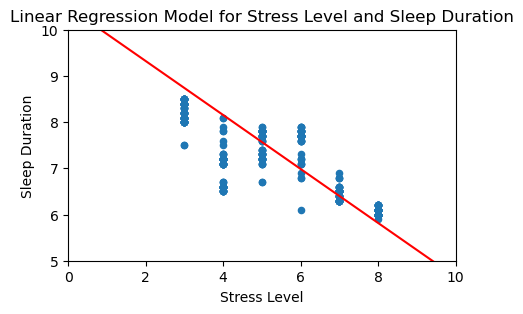

In [ ]:
## Best Fit Model
t0, t1 = model.intercept_[0], model.coef_[0][0]
sleep3.plot(kind='scatter', x="Stress_Level", y='Sleep_Duration', figsize=(5,3))
plt.axis([0, 10, 5, 10])
X=np.linspace(0, 10, 100) 
plt.plot(X, t0 + t1*X, "r")
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title("Linear Regression Model for Stress Level and Sleep Duration")
plt.show()

In [ ]:
## Linear Regression for Stress Levels and Quality of Sleep 
model2 = sklearn.linear_model.LinearRegression()
X2 = np.c_[sleep3["Stress_Level"]]
y2 = np.c_[sleep3["Quality_of_Sleep"]]
# Train the model
model.fit(X2, y2)

LinearRegression()

In [ ]:
model.score(X2, y2)

0.8230489127337512

In [ ]:
model.coef_

array([[-0.58436797]])

In [ ]:
model.intercept_

array([10.49106948])

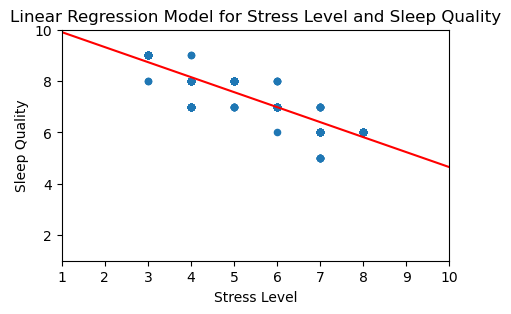

In [ ]:
## best fit model - linear regression
t0, t1 = model.intercept_[0], model.coef_[0][0]
sleep3.plot(kind='scatter', x="Stress_Level", y='Quality_of_Sleep', figsize=(5,3))
plt.axis([1, 10 , 1, 10])
X=np.linspace(0, 10, 100) 
plt.plot(X, t0 + t1*X, "r")
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.title("Linear Regression Model for Stress Level and Sleep Quality")
plt.show()

## Unsupervised Learning - Linear Regression for Stress Levels and Sleep Duration

### K-Means

C:\Users\ASUS\anacoda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


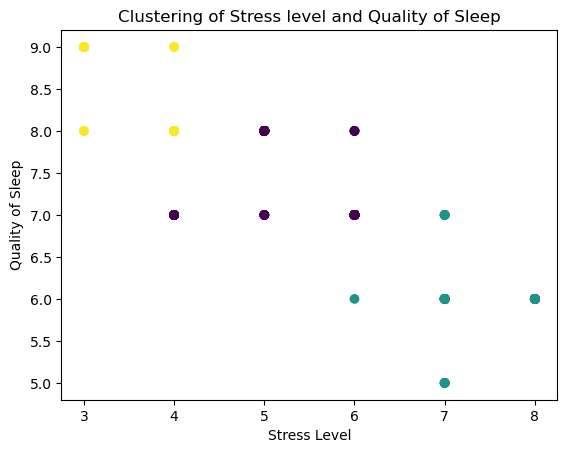

In [ ]:
#predict the data using K-Means cluster
clustering_data = sleep3[['Stress_Level', 'Quality_of_Sleep']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

plt.scatter(clustering_data['Stress_Level'], clustering_data['Quality_of_Sleep'], c=clustering_data['Cluster'])
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Clustering of Stress level and Quality of Sleep')
plt.show()

### Hierarchal Agglomerative Clustering:

In [ ]:
# Select numerical columns relevant for clustering
num_3var= ['Stress_Level', 'Quality_of_Sleep', 'Sleep_Duration']
sleep_numerical2 = sleep3[num_3var]

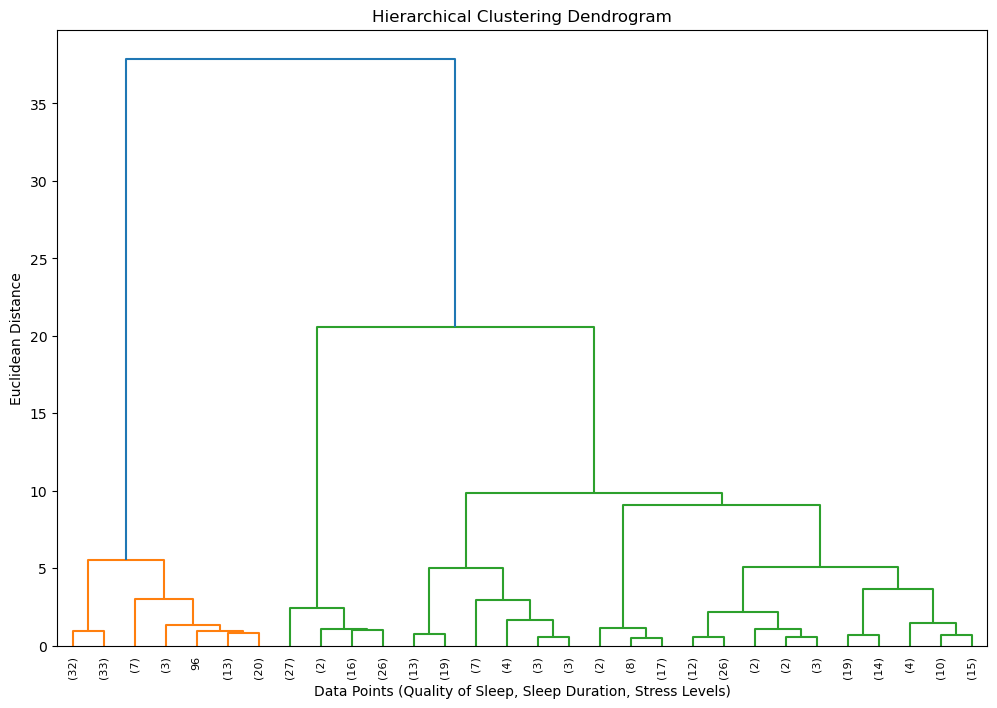

In [ ]:
#scaled data for just quality of sleep and sleep duration, stress levels:
scaler = StandardScaler()
#scaling:
scaled_sleep2 = scaler.fit_transform(sleep_numerical2)

#creating the linkage:
model3 = linkage(scaled_sleep2, method ='ward')

#creating labels for datapoints:
labels = [str(i) for i in range(len(scaled_sleep2))]

# creating the graph:
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (Quality of Sleep, Sleep Duration, Stress Levels)')
plt.ylabel('Euclidean Distance')
dendrogram(model3, leaf_rotation=90, 
           leaf_font_size=8, 
           labels=labels, 
           truncate_mode='lastp')
plt.show()

In [ ]:
## checking the Python Version
! python --version

Python 3.12.7
